# Validation of drive functions

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
import qudit_sim
import qudit_sim.pulse as qpulse

## Constant numeric amplitude

In [2]:
drive = qudit_sim.DriveTerm(frequency=100., amplitude=(0.2+0.3j))

In [3]:
drive.generate_fn(frame_frequency=99., drive_base=2., rwa=False)

('((0.8 * cos(100.0 * t)) + (1.2 * sin(100.0 * t))) * cos(99.0 * t)',
 '((0.8 * cos(100.0 * t)) + (1.2 * sin(100.0 * t))) * sin(99.0 * t)')

In [4]:
drive.generate_fn(frame_frequency=99., drive_base=2., rwa=True)

('(0.4 * cos(1.0 * t)) + (0.6 * sin(1.0 * t))',
 '(-0.4 * sin(1.0 * t)) + (0.6 * cos(1.0 * t))')

## String amplitude

In [5]:
drive = qudit_sim.DriveTerm(frequency=100., amplitude='exp(-(t - 1.)**2/0.5)')

In [6]:
drive.generate_fn(frame_frequency=99., drive_base=2., rwa=False)

('(2. * ((2.0) * (exp(-(t - 1.)**2/0.5))) * (cos(100.0 * t) - 1.j * sin(100.0 * t))).real * cos(99.0 * t)',
 '(2. * ((2.0) * (exp(-(t - 1.)**2/0.5))) * (cos(100.0 * t) - 1.j * sin(100.0 * t))).real * sin(99.0 * t)')

In [7]:
drive.generate_fn(frame_frequency=99., drive_base=2., rwa=True)

('((2.0) * (exp(-(t - 1.)**2/0.5))).real * cos(1.0 * t) + ((2.0) * (exp(-(t - 1.)**2/0.5))).imag * sin(1.0 * t)',
 '((2.0) * (exp(-(t - 1.)**2/0.5))).imag * cos(1.0 * t) - ((2.0) * (exp(-(t - 1.)**2/0.5))).real * sin(1.0 * t)')

In [8]:
drive = qudit_sim.DriveTerm(frequency=100., amplitude='exp(-(t - 1.)**2/0.5)')

In [9]:
drive.generate_fn(frame_frequency=99., drive_base=2., rwa=False)

('(2. * ((2.0) * (exp(-(t - 1.)**2/0.5))) * (cos(100.0 * t) - 1.j * sin(100.0 * t))).real * cos(99.0 * t)',
 '(2. * ((2.0) * (exp(-(t - 1.)**2/0.5))) * (cos(100.0 * t) - 1.j * sin(100.0 * t))).real * sin(99.0 * t)')

In [10]:
drive.generate_fn(frame_frequency=99., drive_base=2., rwa=True)

('((2.0) * (exp(-(t - 1.)**2/0.5))).real * cos(1.0 * t) + ((2.0) * (exp(-(t - 1.)**2/0.5))).imag * sin(1.0 * t)',
 '((2.0) * (exp(-(t - 1.)**2/0.5))).imag * cos(1.0 * t) - ((2.0) * (exp(-(t - 1.)**2/0.5))).real * sin(1.0 * t)')

## Array amplitude

In [11]:
tlist = np.linspace(0., 1., 100)
tlist_fine = np.linspace(0., 1., 1000)
amplitude = np.exp(20.j * tlist)
amplitude_fine = np.exp(20.j * tlist_fine)
drive = qudit_sim.DriveTerm(frequency=100., amplitude=amplitude)

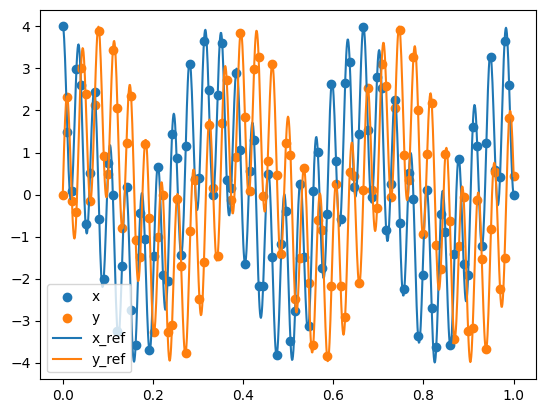

In [12]:
fn_x, fn_y = drive.generate_fn(frame_frequency=99., drive_base=2., rwa=False)
plt.scatter(tlist, fn_x(tlist), label='x')
plt.scatter(tlist, fn_y(tlist), label='y')
plt.plot(tlist_fine, (4. * amplitude_fine * np.exp(-100.j * tlist_fine)).real * np.cos(99. * tlist_fine), label='x_ref')
plt.plot(tlist_fine, (4. * amplitude_fine * np.exp(-100.j * tlist_fine)).real * np.sin(99. * tlist_fine), label='y_ref')
plt.legend();

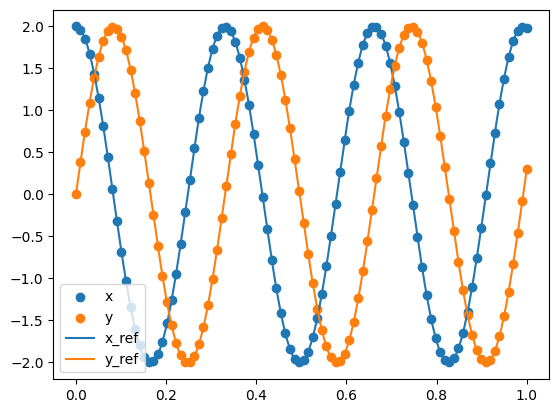

In [13]:
fn_x, fn_y = drive.generate_fn(frame_frequency=99., drive_base=2., rwa=True)
plt.scatter(tlist, fn_x(tlist), label='x')
plt.scatter(tlist, fn_y(tlist), label='y')
plt.plot(tlist_fine, 2. * (amplitude_fine.real * np.cos(1. * tlist_fine) + amplitude_fine.imag * np.sin(1. * tlist_fine)), label='x_ref')
plt.plot(tlist_fine, 2. * (amplitude_fine.imag * np.cos(1. * tlist_fine) - amplitude_fine.real * np.sin(1. * tlist_fine)), label='y_ref')
plt.legend();

## Function amplitude

In [14]:
def amplitude_fn(t, arg=(), npmod=np):
    return npmod.exp(20.j * t)

drive = qudit_sim.DriveTerm(frequency=100., amplitude=amplitude_fn)

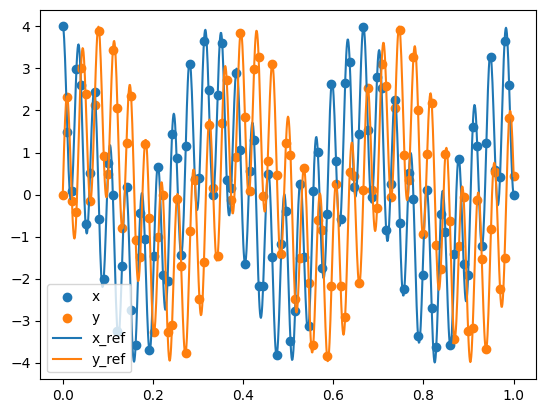

In [15]:
fn_x, fn_y = drive.generate_fn(frame_frequency=99., drive_base=2., rwa=False)
plt.scatter(tlist, fn_x(tlist), label='x')
plt.scatter(tlist, fn_y(tlist), label='y')
plt.plot(tlist_fine, (4. * amplitude_fn(tlist_fine) * np.exp(-100.j * tlist_fine)).real * np.cos(99. * tlist_fine), label='x_ref')
plt.plot(tlist_fine, (4. * amplitude_fn(tlist_fine) * np.exp(-100.j * tlist_fine)).real * np.sin(99. * tlist_fine), label='y_ref')
plt.legend();

Using JAX

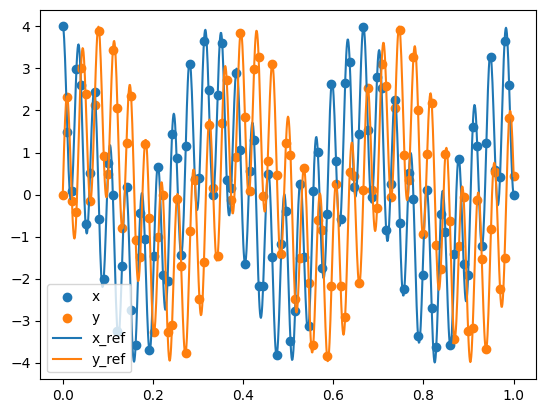

In [16]:
fn_x, fn_y = drive.generate_fn(frame_frequency=99., drive_base=2., rwa=False)
plt.scatter(tlist, fn_x(tlist, npmod=jnp), label='x')
plt.scatter(tlist, fn_y(tlist, npmod=jnp), label='y')
plt.plot(tlist_fine, (4. * amplitude_fn(tlist_fine, npmod=jnp) * jnp.exp(-100.j * tlist_fine)).real * jnp.cos(99. * tlist_fine), label='x_ref')
plt.plot(tlist_fine, (4. * amplitude_fn(tlist_fine, npmod=jnp) * jnp.exp(-100.j * tlist_fine)).real * jnp.sin(99. * tlist_fine), label='y_ref')
plt.legend();

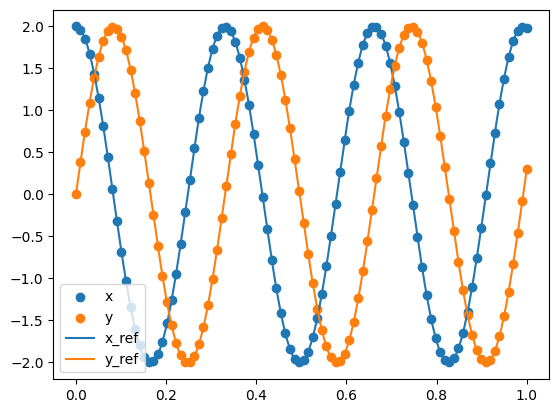

In [17]:
fn_x, fn_y = drive.generate_fn(frame_frequency=99., drive_base=2., rwa=True)
plt.scatter(tlist, fn_x(tlist), label='x')
plt.scatter(tlist, fn_y(tlist), label='y')
amplitude_fine = amplitude_fn(tlist_fine)
plt.plot(tlist_fine, 2. * (amplitude_fine.real * np.cos(1. * tlist_fine) + amplitude_fine.imag * np.sin(1. * tlist_fine)), label='x_ref')
plt.plot(tlist_fine, 2. * (amplitude_fine.imag * np.cos(1. * tlist_fine) - amplitude_fine.real * np.sin(1. * tlist_fine)), label='y_ref')
plt.legend();

Using JAX

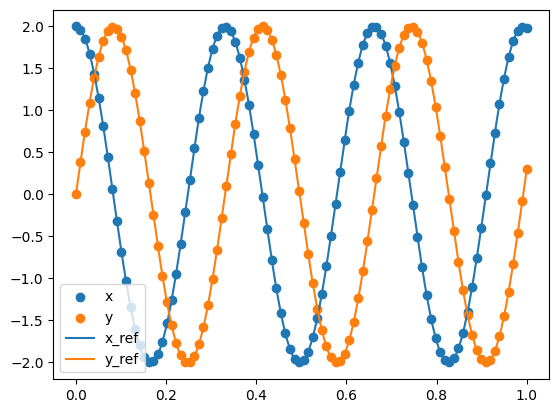

In [18]:
fn_x, fn_y = drive.generate_fn(frame_frequency=99., drive_base=2., rwa=True)
plt.scatter(tlist, fn_x(tlist, npmod=jnp), label='x')
plt.scatter(tlist, fn_y(tlist, npmod=jnp), label='y')
amplitude_fine = amplitude_fn(tlist_fine, npmod=jnp)
plt.plot(tlist_fine, 2. * (amplitude_fine.real * jnp.cos(1. * tlist_fine) + amplitude_fine.imag * jnp.sin(1. * tlist_fine)), label='x_ref')
plt.plot(tlist_fine, 2. * (amplitude_fine.imag * jnp.cos(1. * tlist_fine) - amplitude_fine.real * jnp.sin(1. * tlist_fine)), label='y_ref')
plt.legend();

## Pulse sequence

In [19]:
drag = qpulse.Drag(duration=0.4, amp=0.8, sigma=0.1, beta=0.02)
gaussq = qpulse.GaussianSquare(duration=1.4, amp=0.6, sigma=0.1, width=1.)
sequence = qudit_sim.PulseSequence([
    qudit_sim.SetFrequency(100.),
    qudit_sim.SetPhase(0.1),
    drag,
    qudit_sim.Delay(0.3),
    qudit_sim.ShiftPhase(0.2),
    qudit_sim.ShiftFrequency(-1.),
    gaussq
])

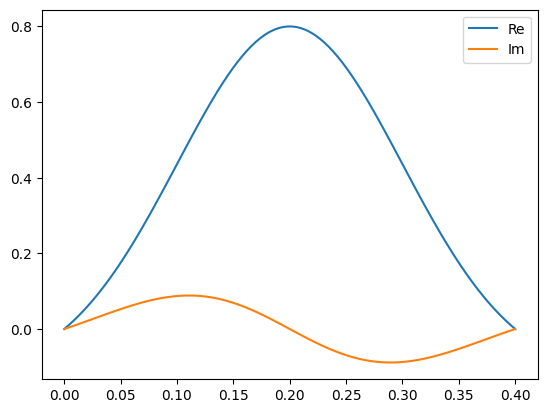

In [20]:
tlist = np.linspace(0., 0.4, 100)
plt.plot(tlist, drag(tlist).real, label='Re')
plt.plot(tlist, drag(tlist).imag, label='Im')
plt.legend();

Using JAX

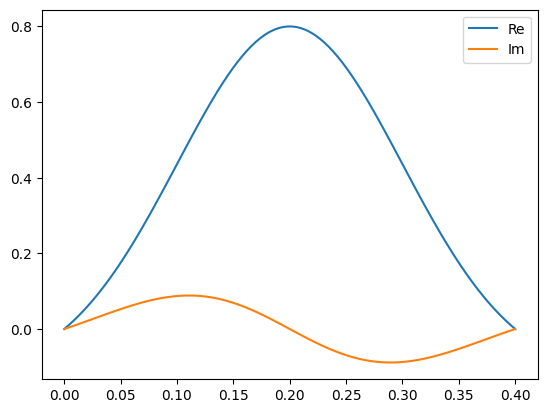

In [21]:
tlist = np.linspace(0., 0.4, 100)
plt.plot(tlist, drag(tlist, npmod=jnp).real, label='Re')
plt.plot(tlist, drag(tlist, npmod=jnp).imag, label='Im')
plt.legend();

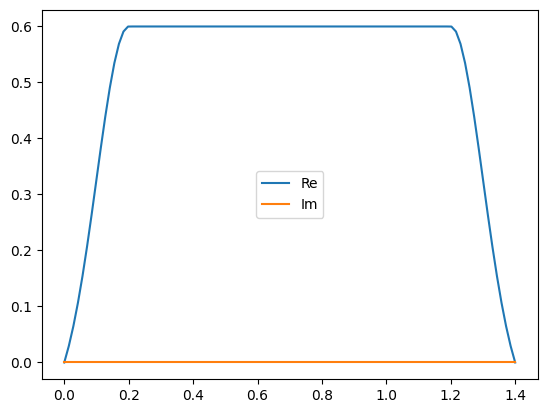

In [22]:
tlist = np.linspace(0., 1.4, 100)
plt.plot(tlist, gaussq(tlist).real, label='Re')
plt.plot(tlist, gaussq(tlist).imag, label='Im')
plt.legend();

Using JAX

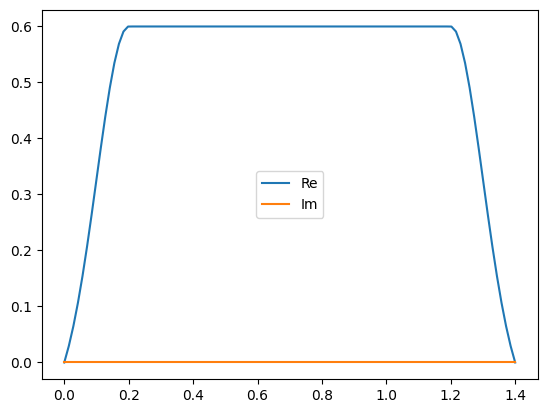

In [23]:
tlist = np.linspace(0., 1.4, 100)
plt.plot(tlist, gaussq(tlist, npmod=jnp).real, label='Re')
plt.plot(tlist, gaussq(tlist, npmod=jnp).imag, label='Im')
plt.legend();

In [24]:
tlist_1 = np.linspace(0., 0.4, 400, endpoint=False)
tlist_2 = np.linspace(0.4, 0.7, 300, endpoint=False)
tlist_3 = np.linspace(0.7, 2.1, 1400, endpoint=False)
tlist = np.concatenate((tlist_1, tlist_2, tlist_3))

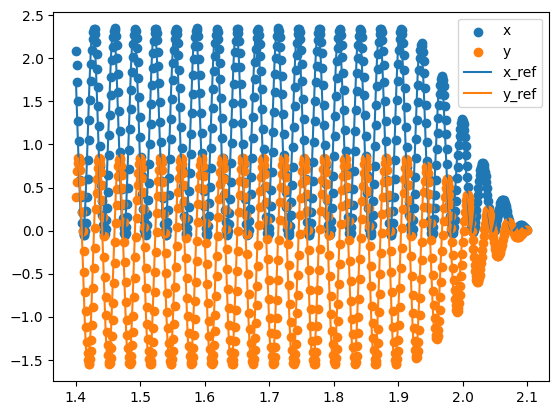

In [25]:
drive = qudit_sim.DriveTerm(sequence=sequence)
fn_x, fn_y = drive.generate_fn(frame_frequency=99., drive_base=2., rwa=False)

envelope_1 = (4. * drag(tlist_1) * np.exp(-1.j * (100. * tlist_1 + 0.1))).real
envelope_2 = np.zeros_like(tlist_2)
envelope_3 = (4. * gaussq(tlist_3 - 0.7) * np.exp(-1.j * (99. * tlist_3 + 0.3))).real

envelope = np.concatenate((envelope_1, envelope_2, envelope_3))

tlist_trunc = tlist[1400:]
envelope_trunc = envelope[1400:]
plt.scatter(tlist_trunc, fn_x(tlist_trunc), label='x')
plt.scatter(tlist_trunc, fn_y(tlist_trunc), label='y')
plt.plot(tlist_trunc, envelope_trunc * np.cos(99. * tlist_trunc), label='x_ref')
plt.plot(tlist_trunc, envelope_trunc * np.sin(99. * tlist_trunc), label='y_ref')
plt.legend();

Using JAX

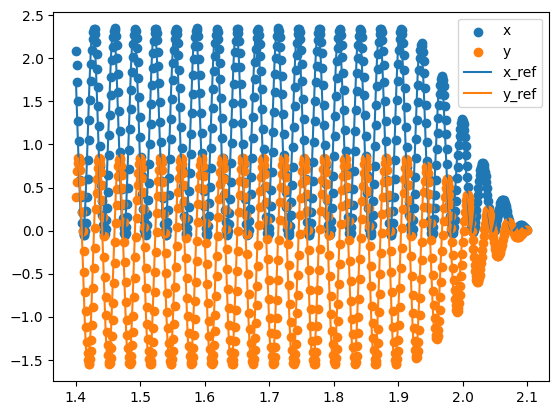

In [26]:
drive = qudit_sim.DriveTerm(sequence=sequence)
fn_x, fn_y = drive.generate_fn(frame_frequency=99., drive_base=2., rwa=False)

envelope_1 = (4. * drag(tlist_1, npmod=jnp) * jnp.exp(-1.j * (100. * tlist_1 + 0.1))).real
envelope_2 = jnp.zeros_like(tlist_2)
envelope_3 = (4. * gaussq(tlist_3 - 0.7, npmod=jnp) * jnp.exp(-1.j * (99. * tlist_3 + 0.3))).real

envelope = jnp.concatenate((envelope_1, envelope_2, envelope_3))

tlist_trunc = tlist[1400:]
envelope_trunc = envelope[1400:]
plt.scatter(tlist_trunc, fn_x(tlist_trunc, npmod=jnp), label='x')
plt.scatter(tlist_trunc, fn_y(tlist_trunc, npmod=jnp), label='y')
plt.plot(tlist_trunc, envelope_trunc * jnp.cos(99. * tlist_trunc), label='x_ref')
plt.plot(tlist_trunc, envelope_trunc * jnp.sin(99. * tlist_trunc), label='y_ref')
plt.legend();

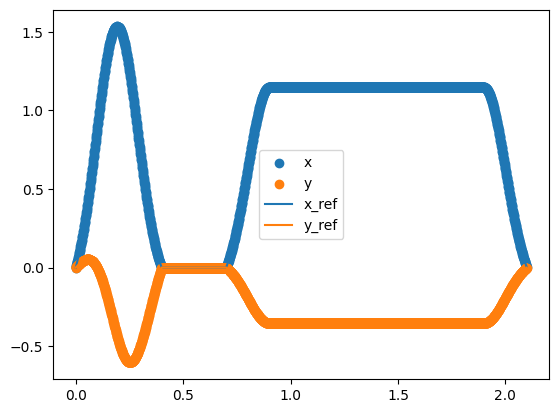

In [27]:
fn_x, fn_y = drive.generate_fn(frame_frequency=99., drive_base=2., rwa=True)

envelope_1 = 2. * drag(tlist_1) * np.exp(-1.j * (1. * tlist_1 + 0.1))
envelope_2 = np.zeros_like(tlist_2)
envelope_3 = 2. * gaussq(tlist_3 - 0.7) * np.exp(-0.3j)

envelope = np.concatenate((envelope_1, envelope_2, envelope_3))

tlist_trunc = tlist[:]
envelope_trunc = envelope[:]
plt.scatter(tlist_trunc, fn_x(tlist_trunc), label='x')
plt.scatter(tlist_trunc, fn_y(tlist_trunc), label='y')
plt.plot(tlist_trunc, envelope_trunc.real, label='x_ref')
plt.plot(tlist_trunc, envelope_trunc.imag, label='y_ref')
plt.legend();

Using JAX

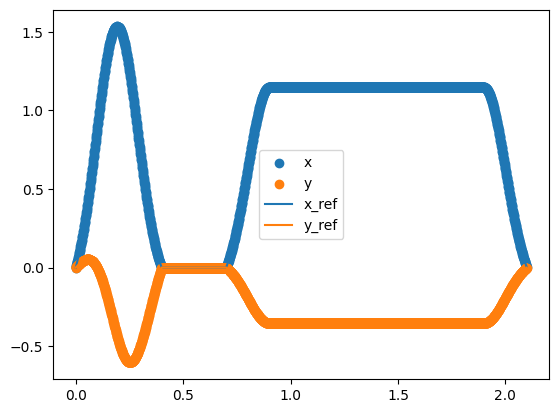

In [28]:
fn_x, fn_y = drive.generate_fn(frame_frequency=99., drive_base=2., rwa=True)

envelope_1 = 2. * drag(tlist_1, npmod=jnp) * jnp.exp(-1.j * (1. * tlist_1 + 0.1))
envelope_2 = jnp.zeros_like(tlist_2)
envelope_3 = 2. * gaussq(tlist_3 - 0.7, npmod=jnp) * jnp.exp(-0.3j)

envelope = jnp.concatenate((envelope_1, envelope_2, envelope_3))

tlist_trunc = tlist[:]
envelope_trunc = envelope[:]
plt.scatter(tlist_trunc, fn_x(tlist_trunc, npmod=jnp), label='x')
plt.scatter(tlist_trunc, fn_y(tlist_trunc, npmod=jnp), label='y')
plt.plot(tlist_trunc, envelope_trunc.real, label='x_ref')
plt.plot(tlist_trunc, envelope_trunc.imag, label='y_ref')
plt.legend();

## Parametric pulse

In [29]:
frequency = qudit_sim.Parameter('frequency')
frequency_shift = qudit_sim.Parameter('frequency_shift')
drag_amp = qudit_sim.Parameter('drag_amp')
drag_beta = qudit_sim.Parameter('drag_beta')
gs_amp = qudit_sim.Parameter('gs_amp')

drag = qpulse.Drag(duration=0.4, amp=drag_amp, sigma=0.1, beta=drag_beta)
gaussq = qpulse.GaussianSquare(duration=1.4, amp=gs_amp, sigma=0.1, width=1.)
sequence = qudit_sim.PulseSequence([
    qudit_sim.SetFrequency(frequency),
    qudit_sim.SetPhase(0.1),
    drag,
    qudit_sim.Delay(0.3),
    qudit_sim.ShiftPhase(0.2),
    qudit_sim.ShiftFrequency(frequency_shift),
    gaussq
])

drive_args = {
    'frequency': 100.,
    'frequency_shift': -1.,
    'drag_amp': 0.8,
    'drag_beta': 0.02,
    'gs_amp': 0.6
}

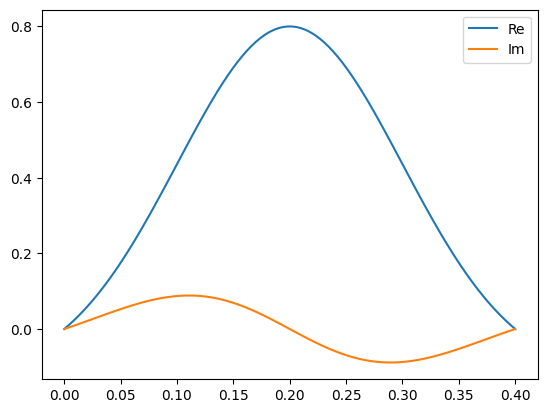

In [30]:
tlist = np.linspace(0., 0.4, 100)
plt.plot(tlist, drag(tlist, drive_args).real, label='Re')
plt.plot(tlist, drag(tlist, drive_args).imag, label='Im')
plt.legend();

Using JAX

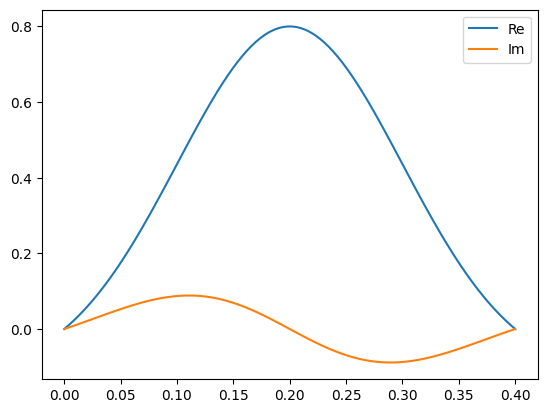

In [31]:
tlist = np.linspace(0., 0.4, 100)
plt.plot(tlist, drag(tlist, drive_args, npmod=jnp).real, label='Re')
plt.plot(tlist, drag(tlist, drive_args, npmod=jnp).imag, label='Im')
plt.legend();

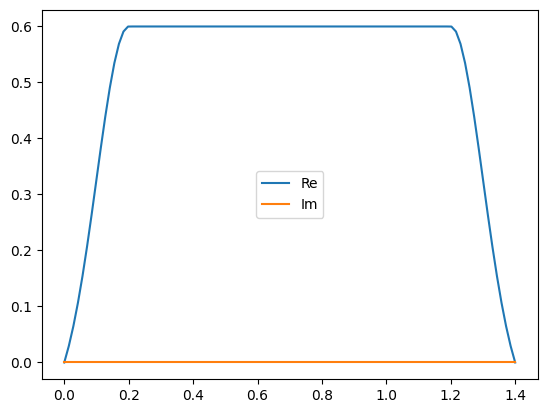

In [32]:
tlist = np.linspace(0., 1.4, 100)
plt.plot(tlist, gaussq(tlist, drive_args).real, label='Re')
plt.plot(tlist, gaussq(tlist, drive_args).imag, label='Im')
plt.legend();

Using JAX

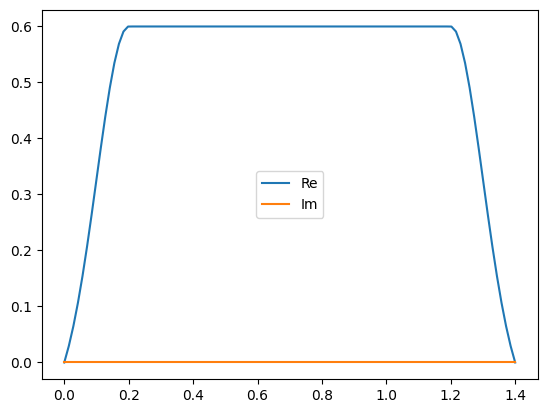

In [33]:
tlist = np.linspace(0., 1.4, 100)
plt.plot(tlist, gaussq(tlist, drive_args, npmod=jnp).real, label='Re')
plt.plot(tlist, gaussq(tlist, drive_args, npmod=jnp).imag, label='Im')
plt.legend();

In [34]:
tlist_1 = np.linspace(0., 0.4, 400, endpoint=False)
tlist_2 = np.linspace(0.4, 0.7, 300, endpoint=False)
tlist_3 = np.linspace(0.7, 2.1, 1400, endpoint=False)
tlist = np.concatenate((tlist_1, tlist_2, tlist_3))

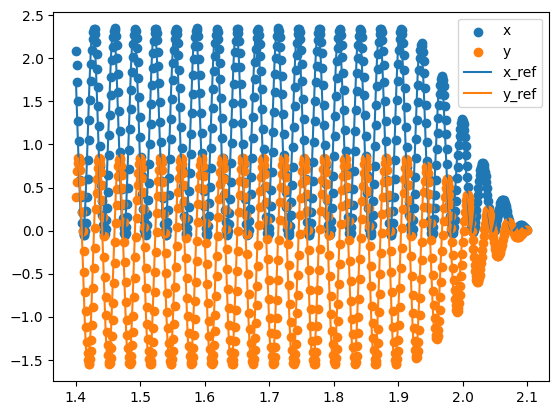

In [35]:
drive = qudit_sim.DriveTerm(sequence=sequence)
fn_x, fn_y = drive.generate_fn(frame_frequency=99., drive_base=2., rwa=False)

envelope_1 = (4. * drag(tlist_1, drive_args) * np.exp(-1.j * (100. * tlist_1 + 0.1))).real
envelope_2 = np.zeros_like(tlist_2)
envelope_3 = (4. * gaussq(tlist_3 - 0.7, drive_args) * np.exp(-1.j * (99. * tlist_3 + 0.3))).real

envelope = np.concatenate((envelope_1, envelope_2, envelope_3))

tlist_trunc = tlist[1400:]
envelope_trunc = envelope[1400:]
plt.scatter(tlist_trunc, fn_x(tlist_trunc, drive_args), label='x')
plt.scatter(tlist_trunc, fn_y(tlist_trunc, drive_args), label='y')
plt.plot(tlist_trunc, envelope_trunc * np.cos(99. * tlist_trunc), label='x_ref')
plt.plot(tlist_trunc, envelope_trunc * np.sin(99. * tlist_trunc), label='y_ref')
plt.legend();

Using JAX

In [36]:
tlist_1 = jnp.linspace(0., 0.4, 400, endpoint=False)
tlist_2 = jnp.linspace(0.4, 0.7, 300, endpoint=False)
tlist_3 = jnp.linspace(0.7, 2.1, 1400, endpoint=False)
tlist = jnp.concatenate((tlist_1, tlist_2, tlist_3))

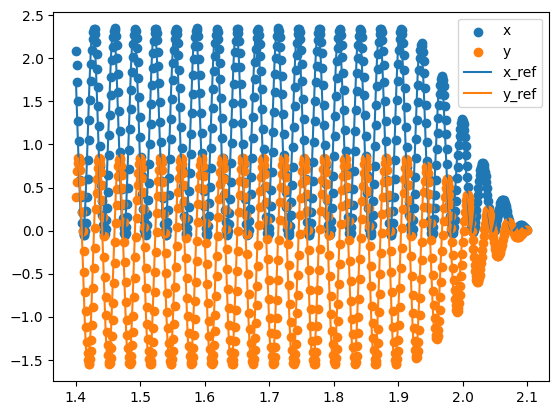

In [37]:
drive = qudit_sim.DriveTerm(sequence=sequence)
fn_x, fn_y = drive.generate_fn(frame_frequency=99., drive_base=2., rwa=False)

envelope_1 = (4. * drag(tlist_1, drive_args, npmod=jnp) * jnp.exp(-1.j * (100. * tlist_1 + 0.1))).real
envelope_2 = jnp.zeros_like(tlist_2)
envelope_3 = (4. * gaussq(tlist_3 - 0.7, drive_args, npmod=jnp) * jnp.exp(-1.j * (99. * tlist_3 + 0.3))).real

envelope = jnp.concatenate((envelope_1, envelope_2, envelope_3))

tlist_trunc = tlist[1400:]
envelope_trunc = envelope[1400:]
plt.scatter(tlist_trunc, fn_x(tlist_trunc, drive_args, npmod=jnp), label='x')
plt.scatter(tlist_trunc, fn_y(tlist_trunc, drive_args, npmod=jnp), label='y')
plt.plot(tlist_trunc, envelope_trunc * jnp.cos(99. * tlist_trunc), label='x_ref')
plt.plot(tlist_trunc, envelope_trunc * jnp.sin(99. * tlist_trunc), label='y_ref')
plt.legend();

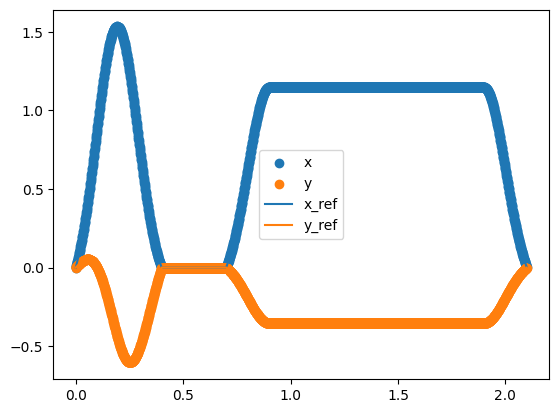

In [38]:
fn_x, fn_y = drive.generate_fn(frame_frequency=99., drive_base=2., rwa=True)

envelope_1 = 2. * drag(tlist_1, drive_args) * np.exp(-1.j * (1. * tlist_1 + 0.1))
envelope_2 = np.zeros_like(tlist_2)
envelope_3 = 2. * gaussq(tlist_3 - 0.7, drive_args) * np.exp(-0.3j)

envelope = np.concatenate((envelope_1, envelope_2, envelope_3))

tlist_trunc = tlist[:]
envelope_trunc = envelope[:]
plt.scatter(tlist_trunc, fn_x(tlist_trunc, drive_args), label='x')
plt.scatter(tlist_trunc, fn_y(tlist_trunc, drive_args), label='y')
plt.plot(tlist_trunc, envelope_trunc.real, label='x_ref')
plt.plot(tlist_trunc, envelope_trunc.imag, label='y_ref')
plt.legend();

Using JAX

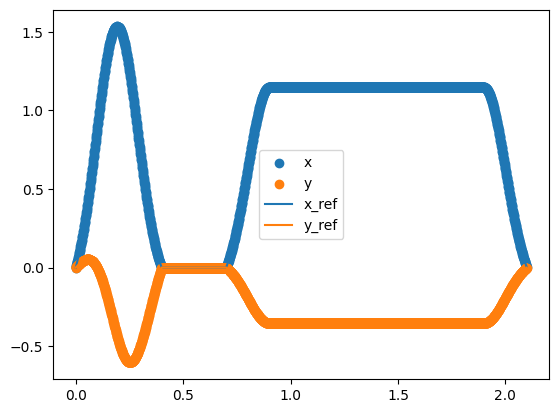

In [39]:
fn_x, fn_y = drive.generate_fn(frame_frequency=99., drive_base=2., rwa=True)

envelope_1 = 2. * drag(tlist_1, drive_args, npmod=jnp) * jnp.exp(-1.j * (1. * tlist_1 + 0.1))
envelope_2 = jnp.zeros_like(tlist_2)
envelope_3 = 2. * gaussq(tlist_3 - 0.7, drive_args, npmod=jnp) * jnp.exp(-0.3j)

envelope = jnp.concatenate((envelope_1, envelope_2, envelope_3))

tlist_trunc = tlist[:]
envelope_trunc = envelope[:]
plt.scatter(tlist_trunc, fn_x(tlist_trunc, drive_args, npmod=jnp), label='x')
plt.scatter(tlist_trunc, fn_y(tlist_trunc, drive_args, npmod=jnp), label='y')
plt.plot(tlist_trunc, envelope_trunc.real, label='x_ref')
plt.plot(tlist_trunc, envelope_trunc.imag, label='y_ref')
plt.legend();